# Dates in Pandas

- Pandas can process dates data during import or after import
- Pandas provides 2 primary date types for working with dates and times
    - `datetime64[ns]` represents a specific moment in time, with nanosecond precision
    - `timedelta64[ns]` represents a duration, such as time difference between 2 dates

In [3]:
import pandas as pd
import numpy as np

## Basic Concepts

### Creating a Date Range

In [ ]:
my_date_range = pd.date_range(start='2023-01-01',end='2024-12-31')
my_date_range

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=731, freq='D')

You can adjust start, end, periods, frequency (week, day, 5h)


### Parsing Dates

In [7]:
date_list = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06']

date_series = pd.to_datetime(date_list)
date_series

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq=None)

You can specify:
- input format e.g. '%Y/%m/%d'
- utc
- origin for unix based format
- errors tells pandas what to do if there's a bad date format

Parsing dates with different format example (to learn about the date part syntax use https://strftime.org/)

In [9]:
date_list = ['01/01/2023', '01/02/2023'] #this format has US-based format

date_series = pd.to_datetime(date_list, format='%m/%d/%Y')
date_series

DatetimeIndex(['2023-01-01', '2023-01-02'], dtype='datetime64[ns]', freq=None)

To view the output as the original input, you need to convert it to a string, but you are no longer able to run date operations. 

In [10]:
date_series.strftime('%m/%d/%Y')

Index(['01/01/2023', '01/02/2023'], dtype='object')

### Date Arithmetic

Pandas allows you to perform date arithmetic using `timedelta`

In [11]:
date_list = ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06']

date_series = pd.to_datetime(date_list)
date_series

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq=None)

In [12]:
# add 3 days to the dates
date_series = date_series + pd.Timedelta(days=3)
date_series

DatetimeIndex(['2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07',
               '2023-01-08', '2023-01-09'],
              dtype='datetime64[ns]', freq=None)

you can add/subtract days, seconds, hours, months, etc...

With date vs date operations, no need to use timedelta as long as both have datetime format.

In [13]:
date1 = pd.to_datetime('2023-01-04')
date2 = pd.to_datetime('2024-12-04')

diff = date2 - date1
diff

Timedelta('700 days 00:00:00')

### Date Functions

#### Extracting Date Components

In [14]:
# extract year, month, and day

my_year = date1.year
my_month = date1.month
my_day = date1.day

print(my_year,'\n',my_month,'\n',my_day)

2023 
 1 
 4


This becomes useful with feature engineering to extract date parts and disregard using the full date.

#### Find the day of the Week

In [15]:
dow = date1.day_of_week
dow

2

In [16]:
date1.strftime('%A')

'Wednesday'

## Exercise

In [ ]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'Drug_Sales.csv')
df.head()

,Date,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In pandas you have to options to parse dates:
- Method1: After importing the data, use `to_datetime()`
- Method2 (easier): Importing the data using `parse_dates` in `read_csv()`


In [19]:
df.dtypes

Date            object
Drug1          float64
Drug2          float64
Drug3          float64
Drug4          float64
Drug5          float64
Drug6          float64
Drug7          float64
Drug8          float64
Drug1_Sales    float64
Drug2_Sales    float64
Drug3_Sales    float64
Drug4_Sales    float64
Drug5_Sales    float64
Drug6_Sales    float64
Drug7_Sales    float64
Drug8_Sales    float64
dtype: object

The date above is in object data type

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date           datetime64[ns]
Drug1                 float64
Drug2                 float64
Drug3                 float64
Drug4                 float64
Drug5                 float64
Drug6                 float64
Drug7                 float64
Drug8                 float64
Drug1_Sales           float64
Drug2_Sales           float64
Drug3_Sales           float64
Drug4_Sales           float64
Drug5_Sales           float64
Drug6_Sales           float64
Drug7_Sales           float64
Drug8_Sales           float64
dtype: object

Method 2

In [23]:
path = '/Users/bassel_instructor/Documents/Datasets/'

df = pd.read_csv(path+'Drug_Sales.csv', parse_dates=['Date'])
df.dtypes

Date           datetime64[ns]
Drug1                 float64
Drug2                 float64
Drug3                 float64
Drug4                 float64
Drug5                 float64
Drug6                 float64
Drug7                 float64
Drug8                 float64
Drug1_Sales           float64
Drug2_Sales           float64
Drug3_Sales           float64
Drug4_Sales           float64
Drug5_Sales           float64
Drug6_Sales           float64
Drug7_Sales           float64
Drug8_Sales           float64
dtype: object

### Feature Extraction
- After we convert the date column to datetime format, we're able to run different date operations and extract date parts
- It's a good practice to define new columns and insert them next to the date format for readability (using `insert()` function)
- `insert(position, name of the column, your function)`

In [ ]:

df.insert(1, 'Year', df['Date'].dt.year)
df.insert(2, 'Month', df['Date'].dt.month)
df.insert(3, 'Day', df['Date'].dt.day)

df.head()

,Date,Year,Month,Day,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2019,9,1,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,2019,9,2,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


If you don't know the index location, and want to insert after a specific column, use the following to get the index location.

In [30]:
position_after_date = df.columns.get_loc('Date')+1
position_after_date

1

Use `strftime` to extract other date parts. e.g. use abbreviated day name

In [25]:
df.insert(4, 'DayName', df['Date'].dt.strftime('%a'))
df.head()

,Date,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,...,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
0,2019-09-01,2019,9,1,Sun,2.00,4.360,5.00,17.000,8.2,...,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
1,2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,...,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,...,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,...,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,...,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


### Date Filtering

In [27]:
my_filter = (df['Date']>'2019-09-01') & (df['Date']<='2019-09-06')

df_filtered = df[my_filter]

df_filtered

,Date,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,...,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
1,2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,...,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2,2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,...,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
3,2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,...,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
4,2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,...,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0
5,2019-09-06,2019,9,6,Fri,1.68,2.670,1.00,28.400,7.0,...,0.0,1.5,1680.0,2136.0,1500.0,17040.0,3850.0,0.0,0.0,1350.0


### Aggregating Dates
- If you already have date parts extracted, use those columns (e.g. Year, Day, etc..)
- If you don't have date parts, you can use the `resample()` function

Example 1: Get total sales by day for Drug1

<Axes: ylabel='DayName'>

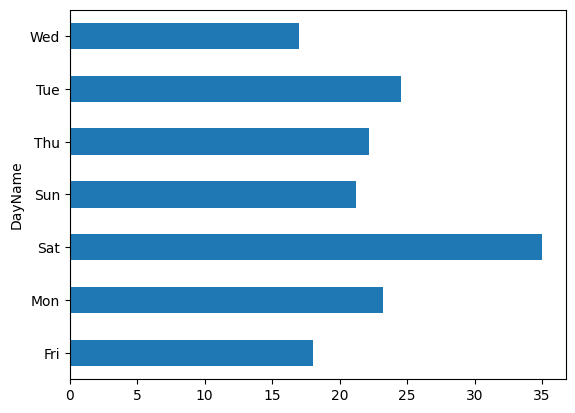

In [32]:
df.groupby('DayName')['Drug1'].sum().plot(kind='barh')

Example 2: before using `resample()`, you need to convert the date column into an index 

In [33]:
df.set_index('Date', drop=True, inplace=True) #drop=True is used to get rid of the Date column and have only the index
df.head() 

,Year,Month,Day,DayName,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,,,,,
2019-09-01,2019,9,1,Sun,2.00,4.360,5.00,17.000,8.2,1.0,5.0,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-02,2019,9,2,Mon,5.33,2.087,2.50,18.000,7.0,0.0,1.0,9.0,5330.0,1669.6,3750.0,10800.0,3850.0,0.0,450.0,8100.0
2019-09-03,2019,9,3,Tue,9.36,2.350,3.10,12.125,8.0,3.0,1.0,2.0,9360.0,1880.0,4650.0,7275.0,4400.0,30000.0,450.0,1800.0
2019-09-04,2019,9,4,Wed,2.00,0.373,2.15,29.230,7.0,0.0,3.0,3.0,2000.0,298.4,3225.0,17538.0,3850.0,0.0,1350.0,2700.0
2019-09-05,2019,9,5,Thu,7.00,9.530,2.00,14.000,1.0,0.0,1.0,8.0,7000.0,7624.0,3000.0,8400.0,550.0,0.0,450.0,7200.0


In [34]:
df.index

DatetimeIndex(['2019-09-01', '2019-09-02', '2019-09-03', '2019-09-04',
               '2019-09-05', '2019-09-06', '2019-09-07', '2019-09-08',
               '2019-09-09', '2019-09-10', '2019-09-11', '2019-09-12',
               '2019-09-13', '2019-09-14', '2019-09-15', '2019-09-16',
               '2019-09-17', '2019-09-18', '2019-09-19', '2019-09-20',
               '2019-09-21', '2019-09-22', '2019-09-23', '2019-09-24',
               '2019-09-25', '2019-09-26', '2019-09-27', '2019-09-28',
               '2019-09-29', '2019-09-30'],
              dtype='datetime64[ns]', name='Date', freq=None)

From here, we can resample (group by) date parts (e.g. month, weeks, 3 days, etc..)

- Below, we'll sum all numeric values by week.
- We'll drop the 'Year','Day','Month','DayName' columns because it doesn't make sense to aggregate them.

In [36]:
weekly_sum = df.drop(columns=['Year','Day','Month','DayName']).resample('W').sum()
weekly_sum.head()

,Drug1,Drug2,Drug3,Drug4,Drug5,Drug6,Drug7,Drug8,Drug1_Sales,Drug2_Sales,Drug3_Sales,Drug4_Sales,Drug5_Sales,Drug6_Sales,Drug7_Sales,Drug8_Sales
Date,,,,,,,,,,,,,,,,
2019-09-01,2.00,4.360,5.00,17.000,8.2,1.0,5.000000,4.0,2000.0,3488.0,7500.0,10200.0,4510.0,10000.0,2250.0,3600.0
2019-09-08,40.71,26.767,15.75,154.755,51.0,6.0,15.000000,28.5,40710.0,21413.6,23625.0,92853.0,28050.0,60000.0,6750.0,25650.0
2019-09-15,35.51,30.977,19.65,178.375,67.2,5.0,30.000000,30.5,35510.0,24781.6,29475.0,107025.0,36960.0,50000.0,13500.0,27450.0
2019-09-22,46.84,25.396,24.40,248.250,31.2,3.0,26.000000,21.0,46840.0,20316.8,36600.0,148950.0,17160.0,30000.0,11700.0,18900.0
2019-09-29,34.01,22.498,26.60,336.700,61.2,1.0,40.416667,23.1,34010.0,17998.4,39900.0,202020.0,33660.0,10000.0,18187.5,20790.0


Compare Drug 1 and Drug 2 sales

<Axes: xlabel='Date'>

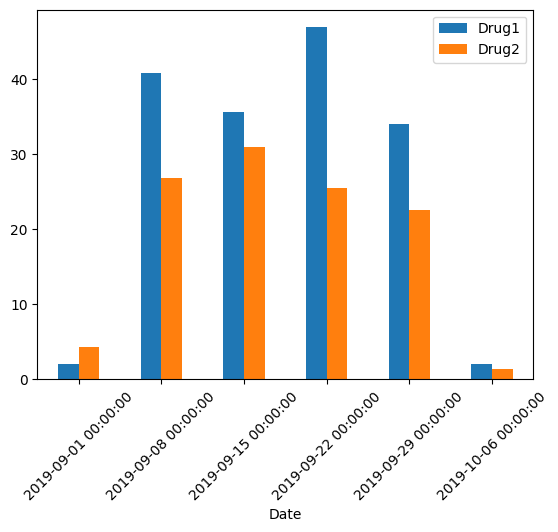

In [38]:
weekly_sum[['Drug1', 'Drug2']].plot(kind='bar', rot=45)